In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [43]:
rain = pd.read_csv('Regional_Avg_Rain.csv')
rain2 = rain[['Date', 'Germany']].copy()

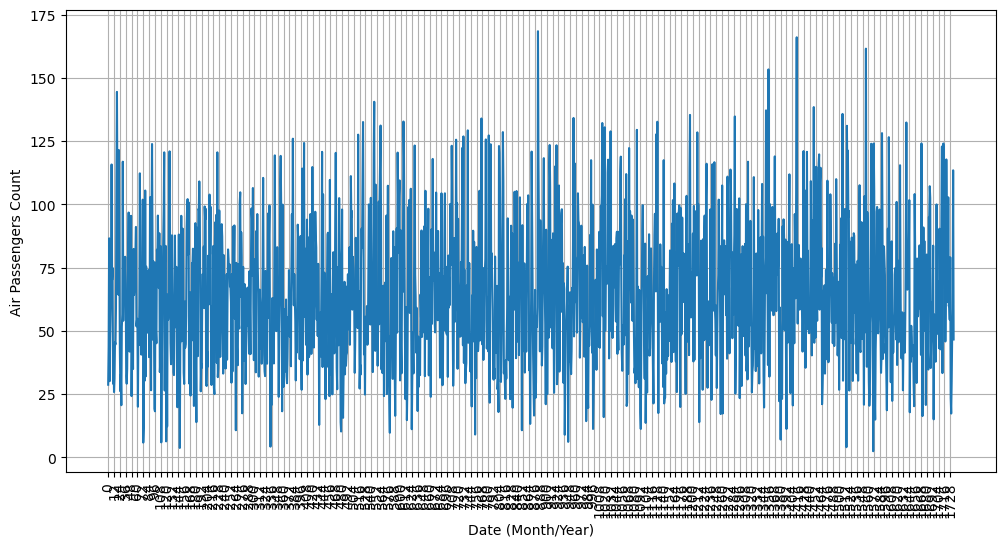

In [51]:
plt.figure(figsize = (12, 6))
plt.xlabel("Date (Month/Year)")
plt.ylabel("Air Passengers Count")

plt.plot(rain.index, rain['Germany'])
plt.xticks(rain.index[::12], rotation = 'vertical')
plt.grid()
plt.show()

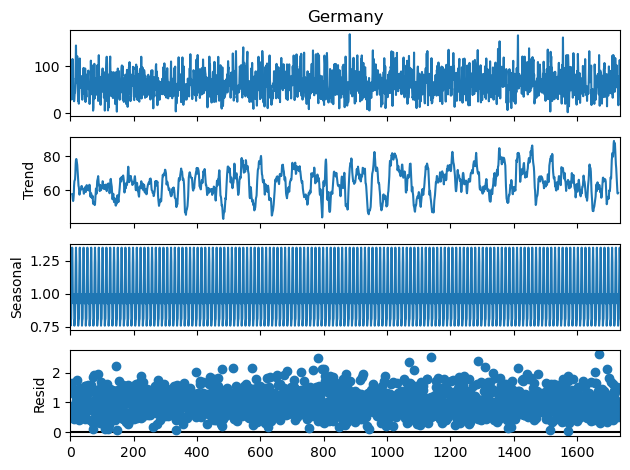

In [45]:
decom = seasonal_decompose(rain['Germany'], model = 'multiplicative', period = 12)
decom.plot()
plt.show()

In [19]:
X,y = [], []
lag = 18
for i in range(len(rain) - lag - 1):
  X.append(rain['Germany'].iloc[i:i+lag])
  y.append(rain['Germany'].iloc[i+lag])
X = np.squeeze(X)
y = np.squeeze(y)
X[0], y[0]

(array([ 28.7,  43.7,  86.6,  30.1,  47.3,  58.7,  69. , 115.8,  70.1,
         74.9,  29.1,  39.6,  25.8,  31. ,  45.6,  44.6,  59.1, 110.4]),
 np.float64(144.5))

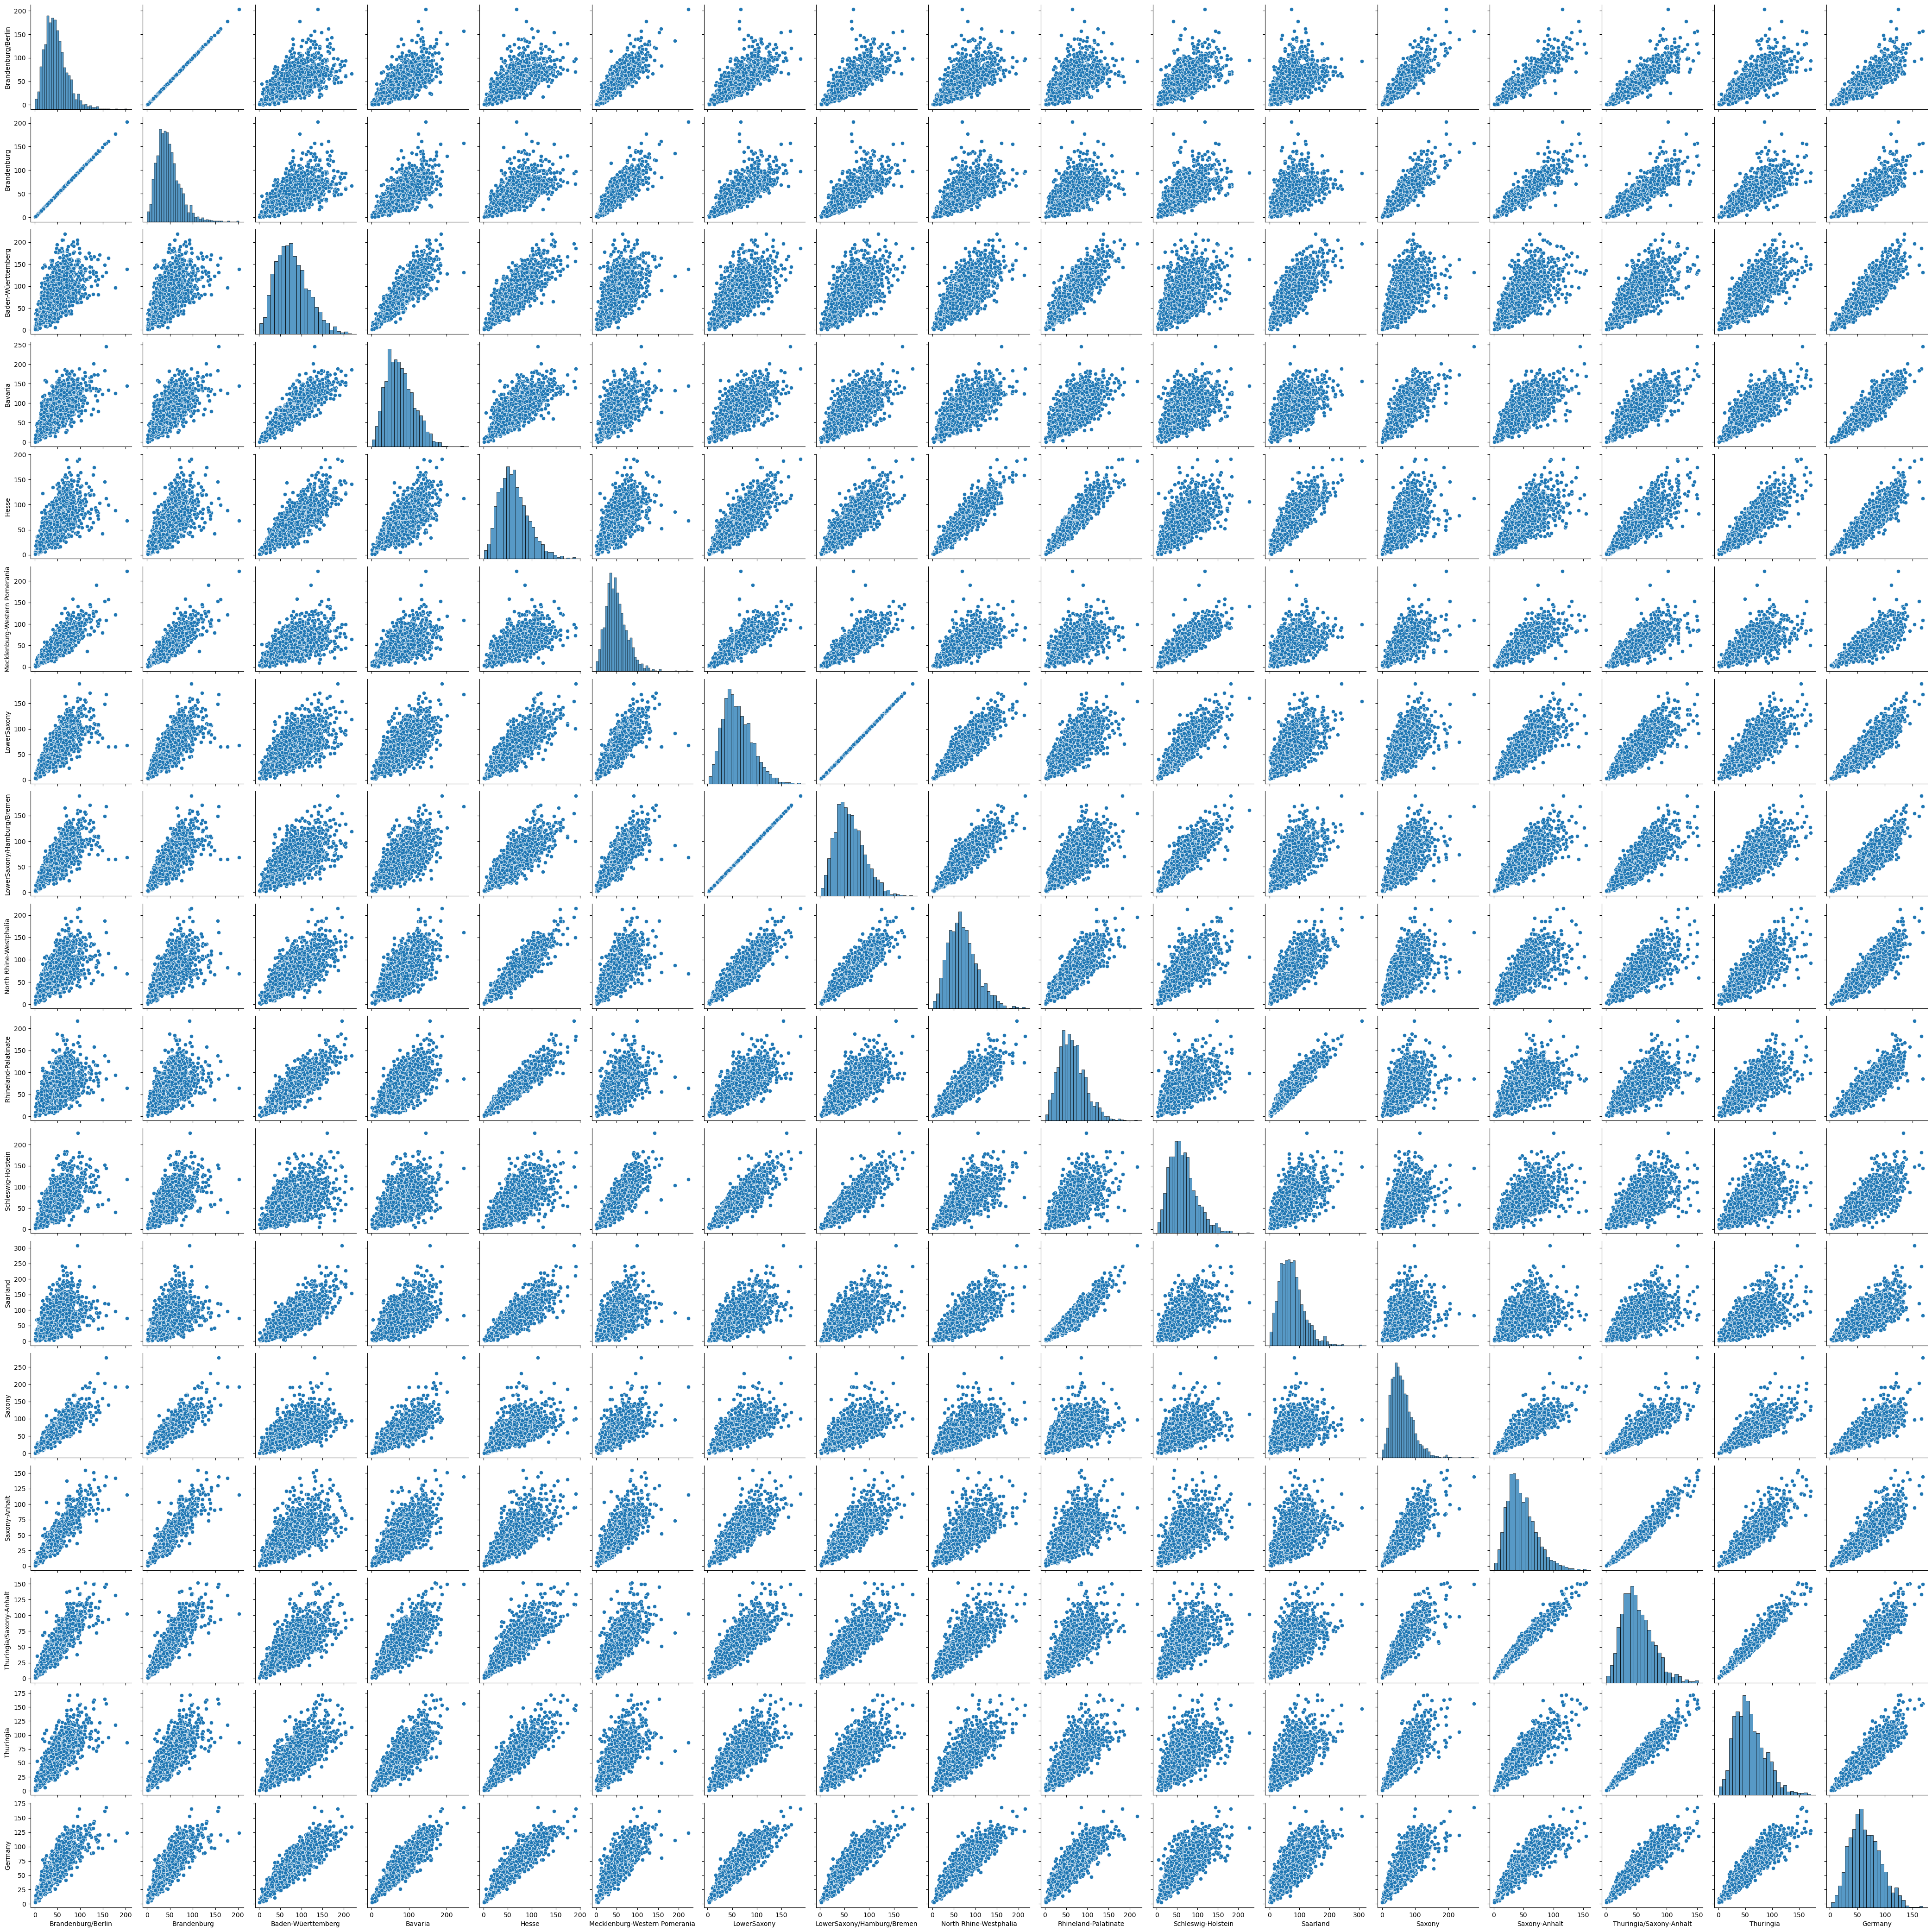

In [20]:
df = rain
sns.pairplot(data = df)

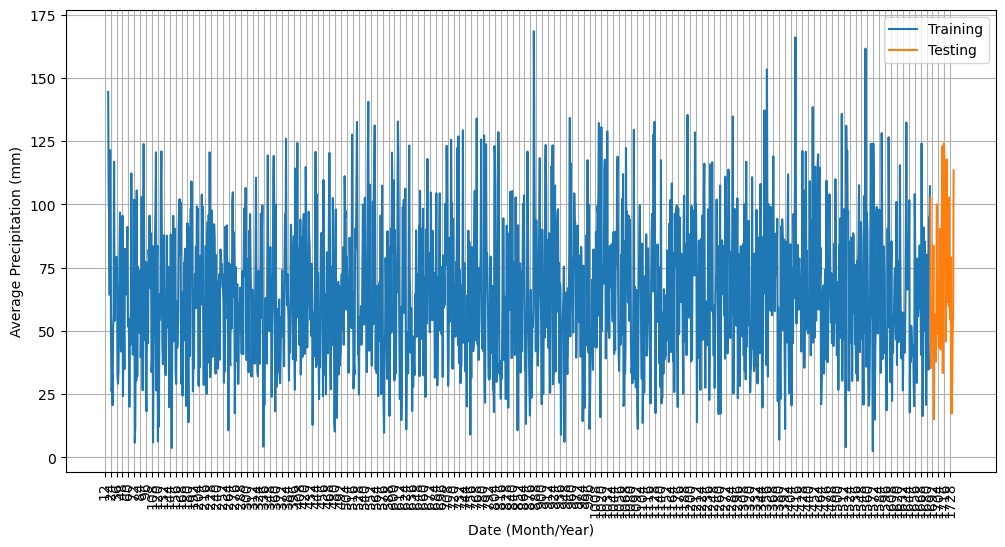

In [21]:
split_idx = 48
x_train, y_train, x_test, y_test = X[:-split_idx], y[:-split_idx], X[-split_idx:], y[-split_idx:]

plt.figure(figsize = (12, 6))
plt.xlabel("Date (Month/Year)")
plt.ylabel("Average Precipitation (mm)")

plt.plot(rain.index[lag + 1:-split_idx], y_train, label = 'Training')
plt.plot(rain.index[-split_idx:], y_test, label = 'Testing')
plt.xticks(rain.index[lag - 6::12], rotation = 'vertical')
plt.legend()
plt.grid()
plt.show()

In [22]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [23]:
predictingset = [x for x in x_train[-1]]
y_pred = []
for i in range(len(x_test)):
    pred = regr.predict([predictingset])
    y_pred.append(pred[0])
    predictingset.append(pred[0])
    predictingset = predictingset[1:]
y_pred

[np.float64(76.14487673850608),
 np.float64(69.83753265804381),
 np.float64(66.21377509433499),
 np.float64(61.96832420060174),
 np.float64(61.64817744718651),
 np.float64(59.58693335972196),
 np.float64(60.83475931431767),
 np.float64(60.406281780868895),
 np.float64(60.347600780598725),
 np.float64(62.2459795243153),
 np.float64(68.38526216158765),
 np.float64(73.09510042834472),
 np.float64(72.23109367025424),
 np.float64(68.6010573991083),
 np.float64(63.5660096924797),
 np.float64(61.95069849347144),
 np.float64(60.72672655312582),
 np.float64(61.08524001402213),
 np.float64(61.83183476273396),
 np.float64(62.355098728083526),
 np.float64(63.12323754536733),
 np.float64(64.49038099938738),
 np.float64(66.09084521195021),
 np.float64(67.34546071515642),
 np.float64(67.38149869654532),
 np.float64(66.10189244358862),
 np.float64(64.31923440187043),
 np.float64(62.89976876911672),
 np.float64(62.329388604761185),
 np.float64(62.46227739761843),
 np.float64(63.005722860685324),
 np.fl

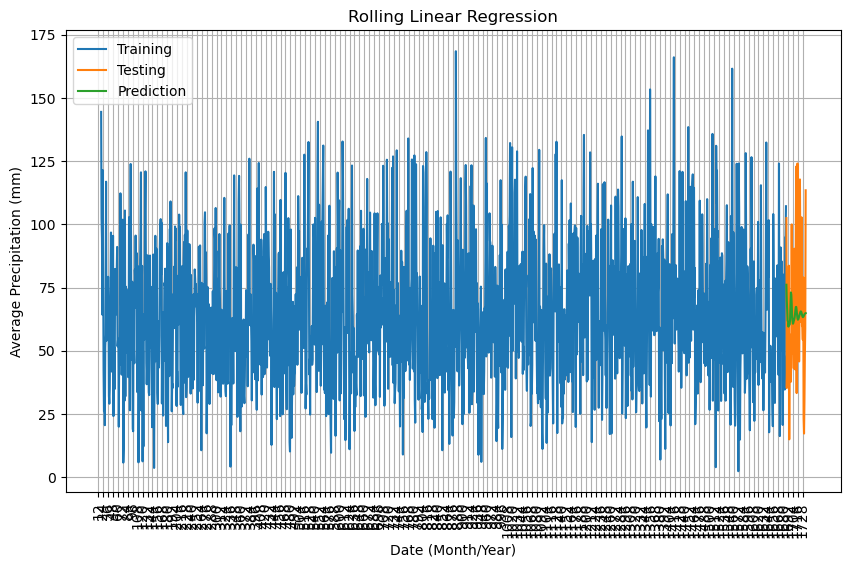

In [24]:
plt.figure(figsize=(10,6))
plt.xlabel("Date (Month/Year)")
plt.ylabel("Average Precipitation (mm)")

plt.plot(rain.index[lag + 1:-split_idx], y_train, label = 'Training')
plt.plot(rain.index[-split_idx:], y_test, label = 'Testing')
plt.plot(rain.index[-split_idx:], y_pred, label = 'Prediction')
plt.xticks(rain.index[lag - 6::12], rotation = 'vertical')
plt.legend()
plt.title('Rolling Linear Regression')
plt.grid()
plt.show()

In [25]:
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

Coefficient of determination: 0.00
Test RMSE: 28.243


**Rolling Mean:**

In [26]:
y_hat_rm = rain.copy()
ma_window = 4
y_hat_rm['RollingMean'] = rain['Germany'].rolling(ma_window).mean()
y_hat_rm.dropna(inplace=True)
y_hat_rm

Date  Brandenburg/Berlin  Brandenburg  Baden-Wüerttemberg  \
3     1881-04-01                 8.8          8.8                64.6   
4     1881-05-01                31.3         31.3                61.5   
5     1881-06-01                62.3         62.1                75.5   
6     1881-07-01                50.5         50.5                80.9   
7     1881-08-01                95.2         95.2               128.2   
...          ...                 ...          ...                 ...   
1731  2025-04-01                14.0         14.1                31.4   
1732  2025-05-01                32.5         32.6                57.8   
1733  2025-06-01                36.3         36.5                74.1   
1734  2025-07-01               135.0        135.0               131.2   
1735  2025-08-01                28.0         28.1                85.0   

      Bavaria  Hesse  Mecklenburg-Western Pomerania  LowerSaxony  \
3        52.4   26.2                            5.2         11.9   
4        95.0   31.1                           16.3         25.8   
5        83.9   41.0                           41.5         39.7   
6        76.8   58.2                           64.8         72.9   
7       124.4  104.4                           86.9        110.4   
...       ...    ...                            ...          ...   
1731     23.9   41.6                           10.9         28.9   
1732     55.5   48.5                           37.7         43.0   
1733     69.7   55.2                           58.9         62.4   
1734    136.8   89.4                          128.6         93.1   
1735     66.9   34.3                           29.0         36.4   

      LowerSaxony/Hamburg/Bremen  North Rhine-Westphalia  \
3                           11.8                    28.4   
4                           25.8                    31.9   
5                           39.4                    37.6   
6                           73.7                    67.0   
7                          110.2                   146.0   
...                          ...                     ...   
1731                        28.9                    58.2   
1732                        43.1                    47.7   
1733                        62.5                    57.2   
1734                        93.8                    82.8   
1735                        36.5                    38.4   

      Rhineland-Palatinate  Schleswig-Holstein  Saarland  Saxony  \
3                     41.9                 7.7      48.4    26.3   
4                     38.0                30.0      36.7    57.9   
5                     37.1                32.4      38.3    94.6   
6                     69.8               102.5      84.9    62.2   
7                     99.3               124.0      86.9   135.9   
...                    ...                 ...       ...     ...   
1731                  36.2                25.7      35.2    28.9   
1732                  43.4                55.6      41.9    53.3   
1733                  58.6                72.6      60.3    47.9   
1734                  98.3               139.6     106.8   118.0   
1735                  34.1                52.9      38.4    32.6   

      Saxony-Anhalt  Thuringia/Saxony-Anhalt  Thuringia  Germany  RollingMean  
3              11.1                     18.3       27.4     30.1       47.275  
4              30.4                     33.8       38.0     47.3       51.925  
5              61.3                     62.8       64.6     58.7       55.675  
6              48.1                     49.7       51.8     69.0       51.275  
7              97.2                    105.8      116.7    115.8       72.700  
...             ...                      ...        ...      ...          ...  
1731           28.7                     32.8       38.1     30.0       37.450  
1732           41.5                     46.3       52.5     47.9       29.650  
1733           35.8                     39.2       43.6     

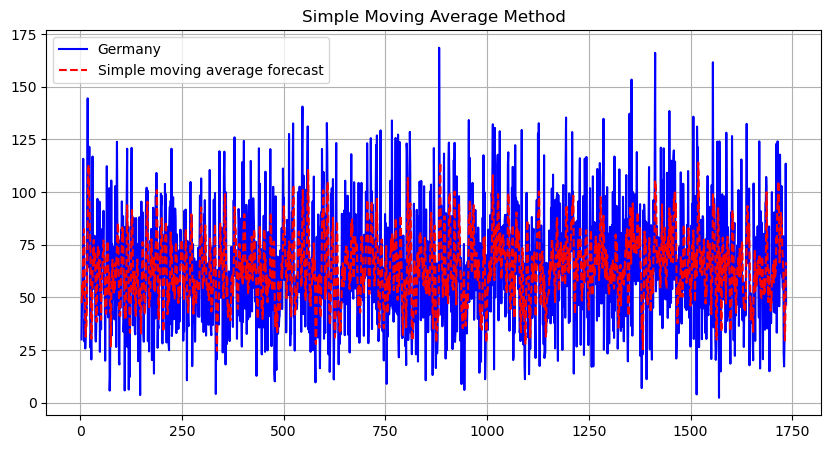

In [27]:
plt.figure(figsize=(10,5))

plt.plot(y_hat_rm['Germany'], label = 'Germany', color = 'blue')
plt.plot(y_hat_rm['RollingMean'], label = 'Simple moving average forecast', linestyle = '--', color = 'red')
plt.legend()
plt.title('Simple Moving Average Method')
plt.grid()
plt.show()

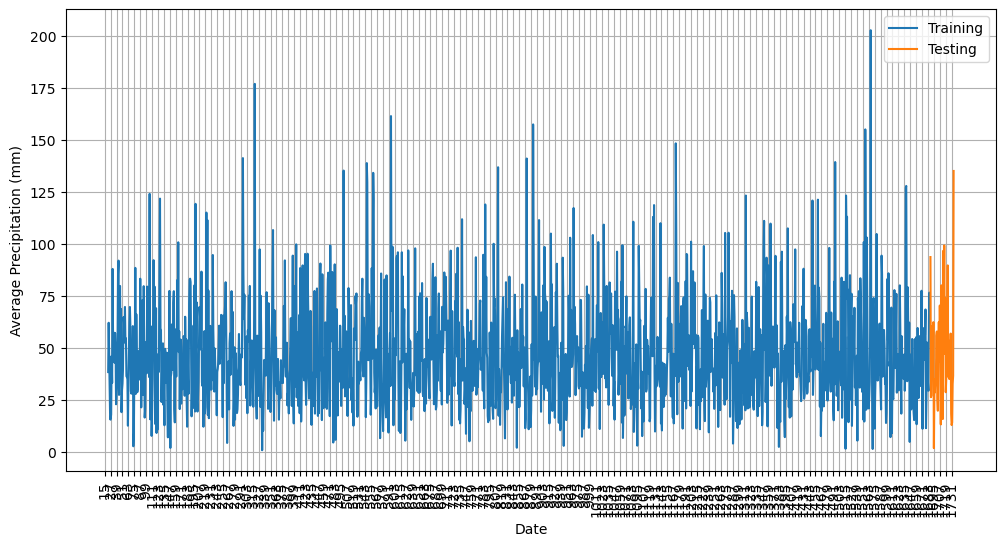

In [28]:
X, y = [], []
lag = 18
for i in range(len(y_hat_rm) - lag - 1):
  X.append(y_hat_rm.iloc[i:i + lag, 2])
  y.append(y_hat_rm.iloc[i + lag, 2])
X = np.squeeze(X)
y = np.squeeze(y)

split_idx = 48
x_train, y_train, x_test, y_test=X[:-split_idx], y[:-split_idx], X[-split_idx:], y[-split_idx:]

plt.figure(figsize = (12, 6))
plt.xlabel("Date")
plt.ylabel("Average Precipitation (mm)")

plt.plot(y_hat_rm.index[lag + 1:-split_idx],y_train, label = 'Training')
plt.plot(y_hat_rm.index[-split_idx:],y_test, label = 'Testing')
plt.xticks(y_hat_rm.index[lag - 6::12],  rotation = 'vertical')
plt.legend()
plt.grid()
plt.show()

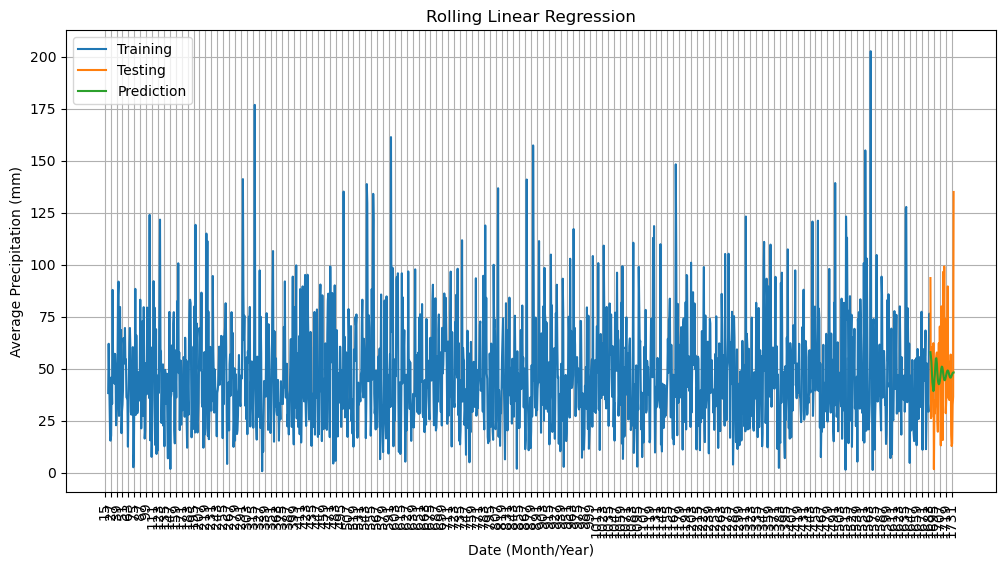

In [29]:
regr = LinearRegression()
regr.fit(x_train, y_train)

predictingset = [x for x in x_train[-1]]
y_pred = []
for i in range(len(x_test)):
    pred = regr.predict([predictingset])
    y_pred.append(pred[0])
    predictingset.append(pred[0])
    predictingset = predictingset[1:]



plt.figure(figsize=(12, 6))
plt.xlabel("Date (Month/Year)")
plt.ylabel("Average Precipitation (mm)")

plt.plot(y_hat_rm.index[lag + 1:-split_idx],y_train, label = 'Training')
plt.plot(y_hat_rm.index[-split_idx:], y_test, label = 'Testing')
plt.plot(y_hat_rm.index[-split_idx:], y_pred, label = 'Prediction')
plt.xticks(y_hat_rm.index[lag-6::12], rotation = 'vertical')
plt.legend()
plt.title('Rolling Linear Regression')
plt.grid()
plt.show()

**ARIMA**

In [30]:
train = pd.DataFrame(rain.iloc[:-split_idx,1])
test = pd.DataFrame(rain.iloc[-split_idx :,1])
test.reset_index(inplace = True, drop = True) 

**ADF**

In [31]:
result = adfuller(rain['Germany'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("The data is not stationary.")
else:
    print("The data is stationary.")

ADF Statistic: -7.330863044124315
p-value: 1.1288323688712497e-10
The data is stationary.


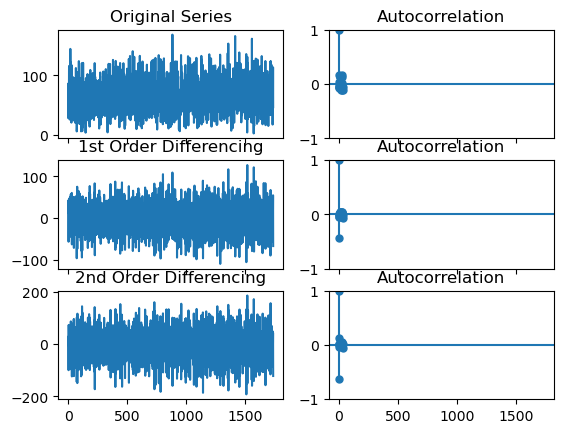

In [32]:
raindf = pd.DataFrame(rain['Germany'])

# Original Series
fig, ax = plt.subplots(3, 2, sharex = True)
ax[0, 0].plot(raindf); ax[0, 0].set_title('Original Series')
plot_acf(raindf, ax = ax[0, 1])

# 1st Differencing
ax[1, 0].plot(raindf.diff()); ax[1, 0].set_title('1st Order Differencing')
plot_acf(raindf.diff().dropna(), ax = ax[1, 1])

# 2nd Differencing
ax[2, 0].plot(raindf.diff().diff()); ax[2, 0].set_title('2nd Order Differencing')
plot_acf(raindf.diff().diff().dropna(), ax = ax[2, 1])

plt.show()

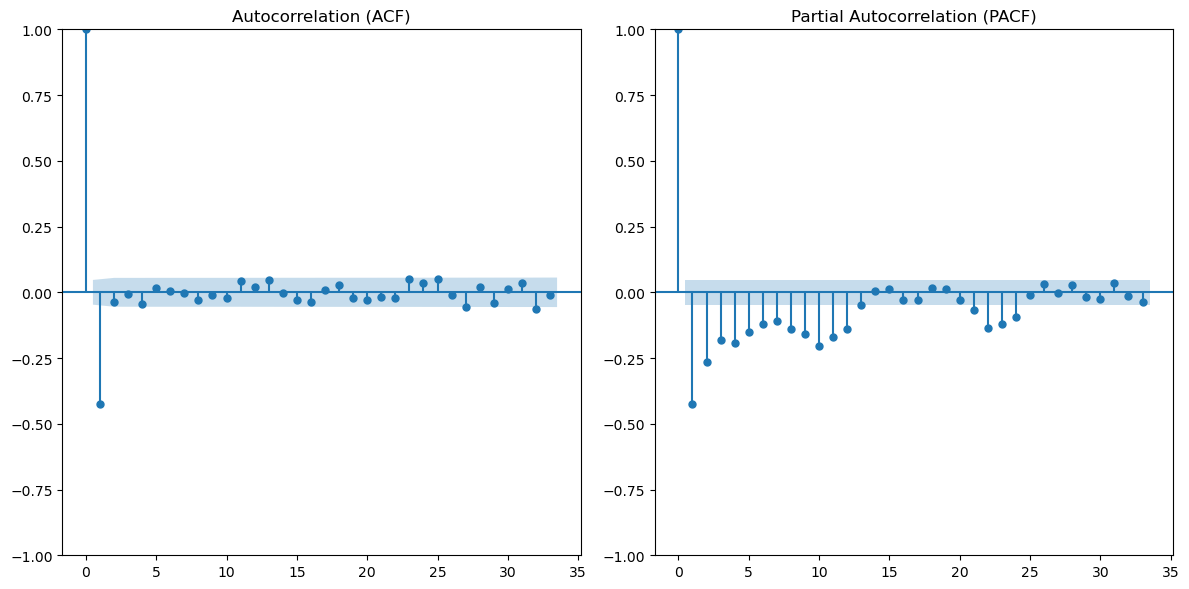

In [33]:
plt.figure(figsize = (12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(raindf.diff().dropna(), ax = plt.gca())
plt.title("Autocorrelation (ACF)")

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(raindf.diff().dropna(), ax = plt.gca())
plt.title("Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()

In [34]:
model = ARIMA(rain['Germany'], seasonal_order=(3,1,2,12)) #p=3, d=1, q=1, period =12
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:                     Germany   No. Observations:                 1736
Model:             ARIMA(3, 1, [1, 2], 12)   Log Likelihood               -8015.792
Date:                     Tue, 30 Sep 2025   AIC                          16043.584
Time:                             18:51:53   BIC                          16076.299
Sample:                                  0   HQIC                         16055.687
                                    - 1736                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.9899      0.061    -16.318      0.000      -1.109      -0.871
ar.S.L24      -0.0671      0.036     -1.881      0.060      -0.137       0.003
ar.S.L36    

In [35]:
model = ARIMA(rain['Germany'], seasonal_order = (1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:                  Germany   No. Observations:                 1736
Model:             ARIMA(1, 1, [1], 12)   Log Likelihood               -8018.409
Date:                  Tue, 30 Sep 2025   AIC                          16042.819
Time:                          18:51:55   BIC                          16059.176
Sample:                               0   HQIC                         16048.870
                                 - 1736                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0471      0.025     -1.884      0.060      -0.096       0.002
ma.S.L12      -0.9735      0.008   -128.178      0.000      -0.988      -0.959
sigma2       628.3092     20.229    

In [36]:
history = list(rain['Germany']) 
predictions = []

for t in range(len(test)):
	model = ARIMA(history, seasonal_order = (1, 1, 1, 12))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	history.append(rain['Germany'].iloc[t])

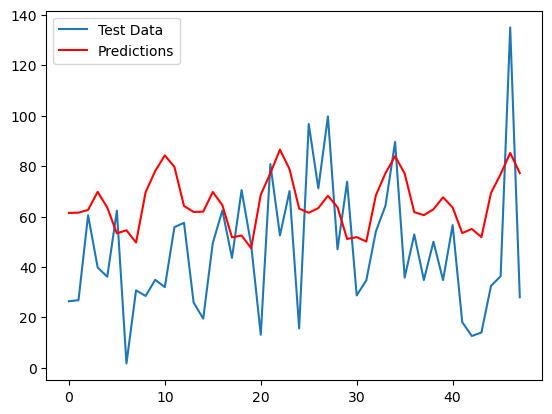

In [37]:
plt.plot(test, label = 'Test Data')
plt.plot(predictions, color = 'red', label = 'Predictions')
plt.legend()
plt.show()

In [38]:
print('Coefficient of determination: %.2f' % r2_score(test, predictions))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Coefficient of determination: -0.42
Test RMSE: 30.654


In [40]:
model = ARIMA(rain['Germany'], order = (2, 1, 1)) #p=3, d=1, q=1
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Germany   No. Observations:                 1736
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -8184.685
Date:                Tue, 30 Sep 2025   AIC                          16377.370
Time:                        19:03:40   BIC                          16399.205
Sample:                             0   HQIC                         16385.445
                               - 1736                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1625      0.023      6.966      0.000       0.117       0.208
ar.L2          0.0116      0.025      0.464      0.643      -0.037       0.060
ma.L1         -0.9977      0.002   -467.210      0.0